In [11]:
import geopandas 
import pandas as pd

In [13]:
gdp = geopandas.read_file('countries.geo.json')
df = pd.read_csv("batallas.csv", encoding='latin-1')

In [14]:
gdp

,id,name,geometry
0,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6..."
2,ALB,Albania,"POLYGON ((20.59025 41.85540, 20.46317 41.51509..."
3,ARE,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000..."
...,...,...,...
175,PSE,West Bank,"POLYGON ((35.54566 32.39399, 35.54525 31.78251..."
176,YEM,Yemen,"POLYGON ((53.10857 16.65105, 52.38521 16.38241..."
177,ZAF,South Africa,"POLYGON ((31.52100 -29.25739, 31.32556 -29.401..."
178,ZMB,Zambia,"POLYGON ((32.75937 -9.23060, 33.23139 -9.67672..."


In [44]:
print(gdp.dtypes)


id            object
name          object
geometry    geometry
dtype: object


In [17]:
df


,Unnamed: 0,Year,Name,Victor,Number,Location,Details,lon,lat
0,1,1337,Battle of Cadzand,England,1,Cadzand,NaN,3.407769,51.369232
1,2,1338,Battle of Arnemuiden,France,2,Arnemuiden,"The first naval battle using artillery, as the...",3.675902,51.501123
2,3,1340,Battle of Sluys,England,3,Sluys,24 June Edward III destroys the Franco-Genoese...,3.487605,51.325360
3,4,1340,Battle of Saint-Omer,France,4,Saint-Omer,The battle of Saint-Omer was the culmination o...,2.252208,50.750115
4,5,1340,Siege of Tournai,France,5,Tournai,Tournai was relieved.,3.387934,50.605648
5,6,1341,Battle of Champtoceaux,France,6,Champtoceaux,NaN,-1.267219,47.337469
6,7,1342,Battle of Brest,England,7,Brest,NaN,-4.486076,48.390394
7,8,1342,Battle of Morlaix,France,8,Morlaix,NaN,-3.828228,48.577613
8,9,1345,Battle of Auberoche,England,9,Auberoche,English surprise attack by Earl of Derby again...,0.913937,45.110680
9,10,1346,Battle of Saint-Pol-de-Léon,England,10,Saint-Pol-de-Leon,NaN,-3.986533,48.685113


<Axes: xlabel='lon', ylabel='lat'>

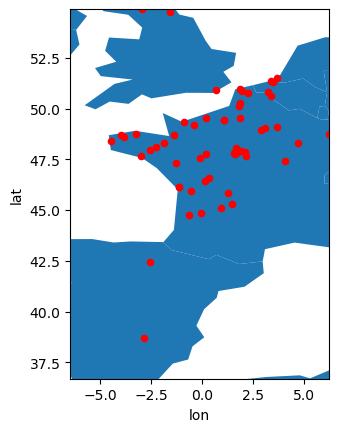

In [70]:
ax = gdp["geometry"].plot()
# Obtener los límites de la geometría
# Obtener el valor máximo y mínimo de longitud y latitud
longitud_max = df['lon'].max()
longitud_min = df['lon'].min()
latitud_max = df['lat'].max()
latitud_min = df['lat'].min()
# Extension extra
a = 2
# Definir los límites de los ejes del gráfico
ax.set_xlim(longitud_min-a, longitud_max)
ax.set_ylim(latitud_min-a, latitud_max)

# Agregar los puntos de ubicaciones al gráfico
df.plot.scatter(x='lon', y='lat', color='red', ax=ax)

In [18]:
conteo_batallas_por_pais = df.groupby('Victor')['Victor'].count()
conteo_batallas_por_pais

Victor
Castille     2
England     28
France      26
Name: Victor, dtype: int64

In [57]:
import pydeck as pdk

layer = pdk.Layer(
    'ScatterplotLayer',  # `type` positional argument is here
    df,
    get_position=['lon', 'lat'],
    auto_highlight=True,
    get_radius=8500,          # Radius is given in meters
    get_fill_color=[180, 0, 200, 140],  # Set an RGBA value for fill
    pickable=True)

# Set the viewport location
view_state = pdk.ViewState(
    longitude=df['lon'].mean(),
    latitude=df['lat'].mean(),
    zoom=6,
    min_zoom=5,
    max_zoom=15,
    pitch=40.5,
    bearing=-27.36)


# Combined all of it and render a viewport
r = pdk.Deck(layers=[layer], initial_view_state=view_state)
r.to_html('batalla-example.html')

In [55]:
df_poblacion = pd.read_csv("poblacion.csv", encoding='latin-1')

In [56]:
df_poblacion

,Unnamed: 0,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,North America,320.27638,324.44694,328.62014,332.72487,336.72143,340.74811,344.89548,349.07829,353.2939,...,417.83236,422.05268,426.06238,430.26938,434.47232,438.82964,443.3473,447.67394,451.83698,456.59331
1,Bermuda,0.05473,0.05491,0.05517,0.05551,0.05585,0.05618,0.05651,0.05683,0.05717,...,0.06361,0.06418,0.06476,0.06534,0.06591,0.06644,0.06692,0.06739,0.06784,0.06827
2,Canada,24.5933,24.9,25.2019,25.4563,25.7018,25.9416,26.2038,26.5497,26.8948,...,31.37674,31.64096,31.88931,32.13476,32.38638,32.65668,32.93596,33.2127,33.48721,33.75974
3,Greenland,0.05021,0.05103,0.05166,0.05211,0.05263,0.05315,0.05364,0.0541,0.05485,...,0.05713,0.05736,0.05754,0.0577,0.05778,0.05764,0.05753,0.05756,0.0576,0.05764
4,Mexico,68.34748,69.96926,71.6409,73.36288,75.08014,76.76723,78.44243,80.12249,81.78182,...,101.24696,102.47993,103.71806,104.95959,106.2029,107.44953,108.70089,109.9554,111.21179,112.46886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,U.S. Pacific Islands,0.13796,0.14283,0.14762,0.15281,0.15825,0.16406,0.17104,0.17903,0.18841,...,0.25365,0.25739,0.26116,0.26494,0.25814,0.24957,0.24888,0.24678,0.24424,0.24221
228,Vanuatu,0.11679,0.12026,0.12379,0.12738,0.13103,0.13473,0.13848,0.14227,0.14612,...,0.19317,0.19646,0.19971,0.20293,0.20609,0.20922,0.21234,0.21545,0.21852,0.22155
229,Vietnam,53.7152,54.90268,56.14218,57.43635,58.76204,60.09307,61.43983,62.82649,64.21135,...,80.20948,81.25796,82.29659,83.35245,84.42493,85.47054,86.51885,87.55836,88.57676,89.57113
230,Wake Island,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
# Cambiar el nombre de la columna
df_poblacion= df_poblacion.rename(columns={'Unnamed: 0': 'Paises'})

In [80]:
df_poblacion

,Paises,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,North America,320.27638,324.44694,328.62014,332.72487,336.72143,340.74811,344.89548,349.07829,353.2939,...,417.83236,422.05268,426.06238,430.26938,434.47232,438.82964,443.3473,447.67394,451.83698,456.59331
1,Bermuda,0.05473,0.05491,0.05517,0.05551,0.05585,0.05618,0.05651,0.05683,0.05717,...,0.06361,0.06418,0.06476,0.06534,0.06591,0.06644,0.06692,0.06739,0.06784,0.06827
2,Canada,24.5933,24.9,25.2019,25.4563,25.7018,25.9416,26.2038,26.5497,26.8948,...,31.37674,31.64096,31.88931,32.13476,32.38638,32.65668,32.93596,33.2127,33.48721,33.75974
3,Greenland,0.05021,0.05103,0.05166,0.05211,0.05263,0.05315,0.05364,0.0541,0.05485,...,0.05713,0.05736,0.05754,0.0577,0.05778,0.05764,0.05753,0.05756,0.0576,0.05764
4,Mexico,68.34748,69.96926,71.6409,73.36288,75.08014,76.76723,78.44243,80.12249,81.78182,...,101.24696,102.47993,103.71806,104.95959,106.2029,107.44953,108.70089,109.9554,111.21179,112.46886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,U.S. Pacific Islands,0.13796,0.14283,0.14762,0.15281,0.15825,0.16406,0.17104,0.17903,0.18841,...,0.25365,0.25739,0.26116,0.26494,0.25814,0.24957,0.24888,0.24678,0.24424,0.24221
228,Vanuatu,0.11679,0.12026,0.12379,0.12738,0.13103,0.13473,0.13848,0.14227,0.14612,...,0.19317,0.19646,0.19971,0.20293,0.20609,0.20922,0.21234,0.21545,0.21852,0.22155
229,Vietnam,53.7152,54.90268,56.14218,57.43635,58.76204,60.09307,61.43983,62.82649,64.21135,...,80.20948,81.25796,82.29659,83.35245,84.42493,85.47054,86.51885,87.55836,88.57676,89.57113
230,Wake Island,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
df_poblacion = df_poblacion.fillna("0")
df_poblacion

,Paises,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,North America,320.27638,324.44694,328.62014,332.72487,336.72143,340.74811,344.89548,349.07829,353.2939,...,417.83236,422.05268,426.06238,430.26938,434.47232,438.82964,443.3473,447.67394,451.83698,456.59331
1,Bermuda,0.05473,0.05491,0.05517,0.05551,0.05585,0.05618,0.05651,0.05683,0.05717,...,0.06361,0.06418,0.06476,0.06534,0.06591,0.06644,0.06692,0.06739,0.06784,0.06827
2,Canada,24.5933,24.9,25.2019,25.4563,25.7018,25.9416,26.2038,26.5497,26.8948,...,31.37674,31.64096,31.88931,32.13476,32.38638,32.65668,32.93596,33.2127,33.48721,33.75974
3,Greenland,0.05021,0.05103,0.05166,0.05211,0.05263,0.05315,0.05364,0.0541,0.05485,...,0.05713,0.05736,0.05754,0.0577,0.05778,0.05764,0.05753,0.05756,0.0576,0.05764
4,Mexico,68.34748,69.96926,71.6409,73.36288,75.08014,76.76723,78.44243,80.12249,81.78182,...,101.24696,102.47993,103.71806,104.95959,106.2029,107.44953,108.70089,109.9554,111.21179,112.46886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,U.S. Pacific Islands,0.13796,0.14283,0.14762,0.15281,0.15825,0.16406,0.17104,0.17903,0.18841,...,0.25365,0.25739,0.26116,0.26494,0.25814,0.24957,0.24888,0.24678,0.24424,0.24221
228,Vanuatu,0.11679,0.12026,0.12379,0.12738,0.13103,0.13473,0.13848,0.14227,0.14612,...,0.19317,0.19646,0.19971,0.20293,0.20609,0.20922,0.21234,0.21545,0.21852,0.22155
229,Vietnam,53.7152,54.90268,56.14218,57.43635,58.76204,60.09307,61.43983,62.82649,64.21135,...,80.20948,81.25796,82.29659,83.35245,84.42493,85.47054,86.51885,87.55836,88.57676,89.57113
230,Wake Island,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
conteo_por_año = df_poblacion.groupby('Paises')['1980'].mean()
conteo_por_año


TypeError: agg function failed [how->mean,dtype->object]